#### **DATA CLEANING: THE NUMBERS(TNDB)**
The Numbers' production budget data is crucial for calculating true return on investment (ROI), which is often more relevant than gross revenue alone. This enables YE Studios to identify which genres and budget ranges offer the best profit margins, not just the highest revenue. The budget-to-revenue ratio analysis helps determine the minimum viable investment for different film categories.

In [61]:
#LOAD DATA:
import pandas as pd
import numpy as np
import gzip

tndb = pd.read_csv("../data/zippedData/tn.movie_budgets.csv.gz", compression = "gzip")
tndb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [62]:
#CLEAN DATA:
##CLEAN COLUMN NAMES:Make column names lowercase and replace spaces with underscores, and remove parantheses.
tndb.columns = tndb.columns.str.strip().str.lower().str.replace(" ","_").str.replace("(","").str.replace(")","")
tndb.head()
tndb.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [63]:
#CLEAN DATES:
#Convert release date to datetime formart.
tndb["release_date"]= pd.to_datetime(tndb["release_date"], errors = "coerce")

#Extract year for analysis:
tndb["release_year"]= tndb["release_date"].dt.year
tndb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [64]:
#CLEAN FINACIAL DATA:
#Remove $ sign and convert to numeric.
tndb["production_budget"]= tndb["production_budget"].str.replace("$","").str.replace(",","")
tndb["production_budget"] = pd.to_numeric(tndb["production_budget"], errors="coerce")


tndb["domestic_gross"]= tndb["domestic_gross"].str.replace("$","").str.replace(",","")
tndb["domestic_gross"] = pd.to_numeric(tndb["domestic_gross"], errors="coerce")


tndb["worldwide_gross"]= tndb["worldwide_gross"].str.replace("$","").str.replace(",","")
tndb["worldwide_gross"] = pd.to_numeric(tndb["worldwide_gross"], errors="coerce")

tndb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [65]:
#CREATE NEW COLUMNS:
#Calcuate profit
tndb["profit"]= tndb["worldwide_gross"]- tndb["production_budget"]

#Calculate return on investement(ROI)
tndb["roi"] = (tndb["profit"] / tndb["production_budget"] * 100)

#Calulate profit margin
tndb["foreign_gross"]= tndb["worldwide_gross"]- tndb["domestic_gross"]

tndb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,roi,foreign_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,2351345279,553.257713,2015837654
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,154.667286,804600000
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650,-57.210757,107000000
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,324.384139,944008095
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,315.369636,696540365


In [66]:
#HANDLE DUPLICATES AND REMOVE MISSING VALUES:
#Sort by worldwide_gross and keep highest grosssing movie for each title.
tndb = tndb.sort_values("worldwide_gross", ascending= False)
tndb = tndb.drop_duplicates(subset= "movie", keep = "first")

#Drop rows where budget or worldwide_gross is missing
tndb = tndb.dropna(subset=["production_budget", "worldwide_gross"])
tndb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,roi,foreign_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,2351345279,553.257713,2015837654
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997,2008208395,1004.104198,1548844451
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,571.016739,1116648995
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200,582.711400,1369318718
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,1433854864,666.909239,996584239


In [67]:
##FINAL CHECK OF CLEANED DATA:
#View cleaned data
tndb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,roi,foreign_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,2351345279,553.257713,2015837654
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997,2008208395,1004.104198,1548844451
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,571.016739,1116648995
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200,582.711400,1369318718
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,1433854864,666.909239,996584239


In [68]:
tndb.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
profit               0
roi                  0
foreign_gross        0
dtype: int64

In [69]:
##Saving cleaned Data:
tndb_movies_cleaned = tndb.copy()
tndb_movies_cleaned.to_csv('../data/cleanedData/tndb_cleaned_data.csv', index=False)

## Data Cleaning: TMDB Movies

The TMDB dataset provides vital metrics on movie popularity and genre classification. To ensure the data is ready for analysis, the following preprocessing steps were performed:

### 1. Removing Redundancy
The `Unnamed: 0` column was dropped, as it represents a duplicate index and does not add analytical value. Removing this column helps streamline the dataframe.

### 2. Temporal Feature Engineering
The `release_date` column was converted to a standard `datetime` format. From this, a new feature, `release_year`, was extracted to enable time-series and trend-based analysis of movie releases.

### 3. Genre Data Parsing
The `genre_ids` column is stored as a string representation of a list (e.g., `"[12, 14]"`). The `ast.literal_eval` function was used to convert these strings into actual Python lists. This transformation allows the genre IDs to be mapped to their corresponding genre names (such as *Action* or *Comedy*) in later stages of the analysis.


In [70]:
# ==========================================
# DATA CLEANING: TMDB Movies
# ==========================================

import ast
import pandas as pd
# Load the dataset directly using the relative path
tmdb_movies = pd.read_csv('../data/zippedData/tmdb.movies.csv.gz')
# Preview the first few rows to ensure successful loading
tmdb_movies.head()

# 1. Drop redundant index column
if 'Unnamed: 0' in tmdb_movies.columns:
    tmdb_movies.drop(columns=['Unnamed: 0'], inplace=True)

# 2. Feature Engineering: Convert release_date to Datetime and extract Year
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])
tmdb_movies['release_year'] = tmdb_movies['release_date'].dt.year

# 3. Clean Genre IDs 
# They are strings like "[12, 14]". We turn them into actual Python lists.
tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

## Data Export

After completing feature engineering and data cleaning, the processed TMDB dataset was saved as a CSV file. This ensures the cleaned data is readily available for the exploratory data analysis (EDA) phase, eliminating the need to rerun the preprocessing and cleaning steps.


In [71]:
tmdb_movies_cleaned = tmdb_movies.copy()
tmdb_movies_cleaned.to_csv('../data/cleanedData/tmdb_cleaned_data.csv', index=False)

# IMDB DATASET

#### Introduction 
The cleaned IMDB dataset provides standardized information on movie titles, genres, runtime, release year, ratings, and vote counts, prepared for analysis. The cleaning process involved merging relevant tables, handling missing values, correcting data types, and removing duplicates to improve data quality and consistency.

This refined dataset supports reliable analysis of movie characteristics and audience reception and will be used alongside other sources to identify trends and inform recommendations on the types of films the studio should produce.

#### Import libraries

In [72]:
import pandas as pd
import sqlite3

#### PATH 

In [73]:
data_path = '../data/zippedData/' # Set data path

#### Connect to IMDB database

In [74]:
conn = sqlite3.connect(data_path + "im.db")

What this does

Opens the IMDB SQLite database

Creates connection called conn

# LOADING IMBD DATA

The IMDB dataset consists of two separate tables: movie_basics and movie_ratings. These tables were merged using the movie_id column to create a unified dataset containing movie titles, genres, runtime, and ratings. Merging the datasets allows for comprehensive analysis of movie characteristics and performance.

#### Load first IMDB table (movie_basics)

In [75]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Load second IMDB table (movie_ratings)

In [76]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### Merge both tables

In [77]:
imdb_movies = movie_basics.merge(movie_ratings, on="movie_id")
imdb_movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


# CLEANING

In [78]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


The imdb_movies.info() function was used to inspect the dataset structure and identify missing values. Columns such as runtime_minutes and genres had fewer non-null entries compared to the total number of rows, indicating missing data that required cleaning before analysis.

#### 1. Remove columns we don’t need
We don’t need original_title.

In [79]:
imdb_movies = imdb_movies.drop(columns=['original_title'])

#### 2. Handle missing runtime
runtime_minutes → 66236 non-null But total rows = 73856 So about 7,000 missing.

We cannot analyze runtime if missing.

Remove those rows:

In [80]:
imdb_movies = imdb_movies.dropna(subset=['runtime_minutes'])

The runtime_minutes column contained several missing values. Since runtime is a key variable in analyzing movie performance and the dataset remained sufficiently large after removal, rows with missing runtime values were dropped to ensure accuracy and consistency in analysis.

#### 3. Remove missing genres

In [81]:
imdb_movies = imdb_movies.dropna(subset=['genres'])

The genres column contained missing values. Since genre is a key variable for identifying movie categories and determining performance by film type, rows with missing genre information were removed to ensure accurate analysis

#### 4. Convert runtime to integer

In [82]:
imdb_movies['runtime_minutes'] = imdb_movies['runtime_minutes'].astype(int)

The runtime_minutes column was converted from float to integer to reflect actual movie runtime values in whole minutes and ensure consistency for analysis.

#### 5. Remove duplicates

Sometimes same movie appears twice.

In [83]:
imdb_movies = imdb_movies.drop_duplicates(subset='primary_title')

6. Final cleaned dataset check

In [84]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62444 entries, 0 to 73852
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         62444 non-null  object 
 1   primary_title    62444 non-null  object 
 2   start_year       62444 non-null  int64  
 3   runtime_minutes  62444 non-null  int32  
 4   genres           62444 non-null  object 
 5   averagerating    62444 non-null  float64
 6   numvotes         62444 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 3.6+ MB


- no missing runtime

- no missing genres

- clean dataset

#### 7. convert genres to lowercase

In [85]:
imdb_movies['genres'] = imdb_movies['genres'].str.lower()

The IMDB dataset has been cleaned by removing unnecessary columns, handling missing values and converting data types. This ensured the dataset was accurate and suitable for analysis...

In [86]:
imdb_movies_cleaned = imdb_movies.copy()
imdb_movies_cleaned.to_csv('../data/cleanedData/imdb_cleaned_data.csv', index = False)

### Data Cleaning: The BOM Dataset 

##### The Box Office Mojo dataset contains movie financial performance data, mainly focusing on box office revenue.To ensure the data is ready for analysis, the following preprocessing steps were performed:

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [88]:
data_path = ('../data/zippedData/')

In [89]:
bom = pd.read_csv(data_path + "bom.movie_gross.csv.gz")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


##### Understanding the Dataset

In [90]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


##### The dataset has 3387 rows and 5 columns

In [91]:
#checking for datatypes
bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [92]:
# Checking for columns in the Dataframe
bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

##### Getting the statistical summary of the DataFrame Columns

In [93]:
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


####  Detecting Missing Values

In [94]:
# Counting missing values per column
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

##### From the dataset information above, we see that two columns has minimal missing values

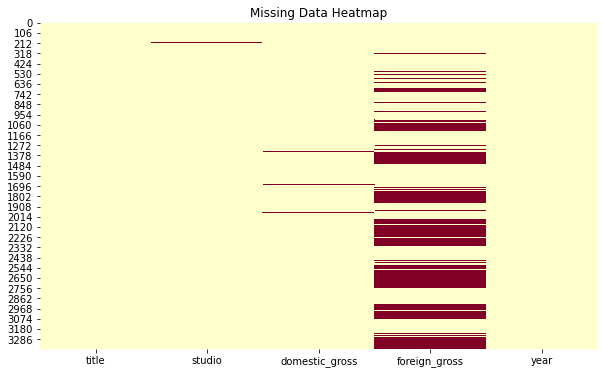

In [95]:
#Plot a heatmap to show missing values

plt.figure(figsize=(10, 6))
sns.heatmap(bom.isnull(), cmap="YlOrRd", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

#### Dropping the rows with minimal missing Values

In [96]:
# Dropping studio and domestic_gross (missing values are minimal)
bom = bom.dropna(subset=['studio','domestic_gross'])

bom = bom.reset_index(drop=True)

In [97]:
#checking how many missing values are in each column of the dataframe bom.
bom.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

##### The studio and domestic gross missing values has been dropped and now we have no missing values in those columns.

### Imputing the columns 

##### Replacing missing values with unknowns for catergorical columns, 0 for Numerical colums and mode for the year column.

In [98]:
# Categorical columns: Title, studio
bom['title'] = bom['title'].fillna('Unknown')
bom['studio'] = bom['studio'].fillna('Unknown')

#Numerical columns: domestic_gross, foreign_gross
bom['domestic_gross'] = bom['domestic_gross'].fillna(0)
bom['foreign_gross'] = bom['foreign_gross'].fillna(0)

# Filling the year column with the mode year
bom['year'] = bom['year'].fillna(bom['year'].mode()[0])

bom.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Dealing with Inconsistencies

#### Checking Inconsistencies in categorical columns

In [99]:
bom["title"].unique().tolist()

['Toy Story 3',
 'Alice in Wonderland (2010)',
 'Harry Potter and the Deathly Hallows Part 1',
 'Inception',
 'Shrek Forever After',
 'The Twilight Saga: Eclipse',
 'Iron Man 2',
 'Tangled',
 'Despicable Me',
 'How to Train Your Dragon',
 'Clash of the Titans (2010)',
 'The Chronicles of Narnia: The Voyage of the Dawn Treader',
 "The King's Speech",
 'Tron Legacy',
 'The Karate Kid',
 'Prince of Persia: The Sands of Time',
 'Black Swan',
 'Megamind',
 'Robin Hood',
 'The Last Airbender',
 'Little Fockers',
 'Resident Evil: Afterlife',
 'Shutter Island',
 'Salt',
 'Sex and the City 2',
 'The Tourist',
 'The Expendables',
 'Grown Ups',
 'Knight & Day',
 'True Grit',
 "Gulliver's Travels",
 'Percy Jackson & The Olympians: The Lightning Thief',
 'The Social Network',
 "Valentine's Day",
 "The Sorcerer's Apprentice",
 'Due Date',
 'Eat Pray Love',
 'Yogi Bear',
 'Red',
 'Paranormal Activity 2',
 'The A-Team',
 'Jackass 3-D',
 'The Other Guys',
 'Unstoppable',
 'Step Up 3-D',
 'The Book of E

In [100]:
bom['studio'].unique().tolist()

['BV',
 'WB',
 'P/DW',
 'Sum.',
 'Par.',
 'Uni.',
 'Fox',
 'Wein.',
 'Sony',
 'FoxS',
 'SGem',
 'WB (NL)',
 'LGF',
 'MBox',
 'CL',
 'W/Dim.',
 'CBS',
 'Focus',
 'MGM',
 'Over.',
 'Mira.',
 'IFC',
 'CJ',
 'NM',
 'SPC',
 'ParV',
 'Gold.',
 'JS',
 'RAtt.',
 'Magn.',
 'Free',
 '3D',
 'UTV',
 'Rela.',
 'Zeit.',
 'Anch.',
 'PDA',
 'Lorb.',
 'App.',
 'Drft.',
 'Osci.',
 'IW',
 'Rog.',
 'Eros',
 'Relbig.',
 'Viv.',
 'Hann.',
 'Strand',
 'NGE',
 'Scre.',
 'Kino',
 'Abr.',
 'CZ',
 'ATO',
 'First',
 'GK',
 'FInd.',
 'NFC',
 'TFC',
 'Pala.',
 'Imag.',
 'NAV',
 'Arth.',
 'CLS',
 'Mont.',
 'Olive',
 'CGld',
 'FOAK',
 'IVP',
 'Yash',
 'ICir',
 'FM',
 'Vita.',
 'WOW',
 'Truly',
 'Indic.',
 'FD',
 'Vari.',
 'TriS',
 'ORF',
 'IM',
 'Elev.',
 'Cohen',
 'NeoC',
 'Jan.',
 'MNE',
 'Trib.',
 'Rocket',
 'OMNI/FSR',
 'KKM',
 'Argo.',
 'SMod',
 'Libre',
 'FRun',
 'WHE',
 'P4',
 'KC',
 'SD',
 'AM',
 'MPFT',
 'Icar.',
 'AGF',
 'A23',
 'Da.',
 'NYer',
 'Rialto',
 'DF',
 'KL',
 'ALP',
 'LG/S',
 'WGUSA',
 'MPI',
 'R

 #### Fixing Inconsistencies

In [101]:
# Fix inconsistencies in categorical columns
bom['studio'] = bom['studio'].str.strip()  # Remove leading/trailing whitespace
bom['title'] = bom['title'].str.strip()  # Standardize capitalization

In [102]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 131.2+ KB


### Changing Data types of columns

##### We change data types to ensure each column is in the correct format so calculations, analysis, and merging work accurately without errors.

In [103]:
bom[bom.select_dtypes(include="float64").columns] = bom[bom.select_dtypes(include="float64").columns].astype("int64")
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3356 non-null   object
 1   studio          3356 non-null   object
 2   domestic_gross  3356 non-null   int64 
 3   foreign_gross   3356 non-null   object
 4   year            3356 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 131.2+ KB


In [104]:
## viewing the first 10 rows after cleaning the data
bom.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010
6,Iron Man 2,Par.,312400000,311500000,2010
7,Tangled,BV,200800000,391000000,2010
8,Despicable Me,Uni.,251500000,291600000,2010
9,How to Train Your Dragon,P/DW,217600000,277300000,2010


##### This is the cleaned data with no missing values, with data types as integer and object, with no inconcistencies

In [105]:
# Saving the cleaned DataFrame to a new CSV file
bom_cleaned = bom.copy()
bom_cleaned.to_csv('../data/cleanedData/bom_cleaned_data.csv', index=False)

# CLEANING ROTTEN TOMATOES 

Rotten Tomatoes comes with two separate datasets, and each serves a different purpose.

Think of them like this:

rt.movie_info → information about the movie itself

rt.reviews → what critics said about the movie

They complement each other.

# Load datasets

In [106]:
data_path = '../data/zippedData/'  # correct path

In [107]:
import pandas as pd

In [108]:
rt_movies = pd.read_csv(
    data_path + "rt.movie_info.tsv.gz",
    sep="\t",
    encoding="latin-1"
)

rt_reviews = pd.read_csv(
    data_path + "rt.reviews.tsv.gz",
    sep="\t",
    encoding="latin-1"
)

#### confirm they load

In [109]:
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [110]:
rt_reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


#### Next inspect structure

In [111]:
rt_movies.shape

(1560, 12)

In [112]:
rt_reviews.shape

(54432, 8)

In [113]:
rt_movies.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [114]:
rt_reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [115]:
rt_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [116]:
rt_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


# 1 — Clean rt_movies

#### Copy dataset

This is to keepthe original dataset as your source of truth and to avoid accidental overwriting 

In [117]:
rt_movies_clean = rt_movies.copy()


#### Fix column formats

In [118]:
rt_movies_clean['theater_date'] = pd.to_datetime(rt_movies_clean['theater_date'], errors='coerce')
rt_movies_clean['dvd_date'] = pd.to_datetime(rt_movies_clean['dvd_date'], errors='coerce')

#### Convert runtime to numeric

In [119]:
rt_movies_clean['runtime'] = rt_movies_clean['runtime'].str.extract('(\d+)')
rt_movies_clean['runtime'] = pd.to_numeric(rt_movies_clean['runtime'], errors='coerce')


In [122]:
rt_movies_clean['runtime'] = (
    rt_movies_clean['runtime']
    .astype(str)
    .str.extract('(\d+)')
)

rt_movies_clean['runtime'] = pd.to_numeric(
    rt_movies_clean['runtime'], errors='coerce'
)


#### Convert box office to numeric

In [123]:
rt_movies_clean['box_office'] = rt_movies_clean['box_office'].str.replace('[\$,]', '', regex=True)
rt_movies_clean['box_office'] = pd.to_numeric(rt_movies_clean['box_office'], errors='coerce')


#### Standardize text columns

In [124]:
text_cols = ['synopsis','genre','director','writer','studio','rating']

for col in text_cols:
    rt_movies_clean[col] = rt_movies_clean[col].str.strip()


#### Remove duplicates

In [125]:
rt_movies_clean = rt_movies_clean.drop_duplicates()


#### Inspect missing values

In [126]:
rt_movies_clean.isna().sum()


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

# 2 — Clean rt_reviews

#### Copy dataset

In [127]:
rt_reviews_clean = rt_reviews.copy()


#### Convert rating to numeric where possible

In [128]:
rt_reviews_clean['rating_num'] = rt_reviews_clean['rating'].str.extract('(\d+\.?\d*)')
rt_reviews_clean['rating_num'] = pd.to_numeric(rt_reviews_clean['rating_num'], errors='coerce')


#### Convert top_critic to category

In [129]:
rt_reviews_clean['top_critic'] = rt_reviews_clean['top_critic'].astype('category')


#### Convert date to datetime

In [130]:
rt_reviews_clean['date'] = pd.to_datetime(rt_reviews_clean['date'], errors='coerce')


#### Clean text fields

In [131]:
text_cols_reviews = ['review','critic','publisher']

for col in text_cols_reviews:
    rt_reviews_clean[col] = rt_reviews_clean[col].str.strip()


#### Remove duplicates

In [132]:
rt_reviews_clean = rt_reviews_clean.drop_duplicates()


#### Inspect missing

In [133]:
rt_reviews_clean.isna().sum()


id                0
review         5556
rating        13516
fresh             0
critic         2713
top_critic        0
publisher       309
date              0
rating_num    19984
dtype: int64

# 3 — Create master Rotten Tomatoes dataset

Now we connect them generically.

In [134]:
rt_master = pd.merge(rt_reviews_clean, rt_movies_clean, on='id', how='left')


In [135]:
rt_master.shape

(54423, 20)

In [136]:
rt_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54423 entries, 0 to 54422
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            54423 non-null  int64         
 1   review        48867 non-null  object        
 2   rating_x      40907 non-null  object        
 3   fresh         54423 non-null  object        
 4   critic        51710 non-null  object        
 5   top_critic    54423 non-null  category      
 6   publisher     54114 non-null  object        
 7   date          54423 non-null  datetime64[ns]
 8   rating_num    34439 non-null  float64       
 9   synopsis      54291 non-null  object        
 10  rating_y      54337 non-null  object        
 11  genre         54336 non-null  object        
 12  director      48984 non-null  object        
 13  writer        45197 non-null  object        
 14  theater_date  53197 non-null  datetime64[ns]
 15  dvd_date      53197 non-null  dateti

In [137]:
rt_master.head()


,id,review,rating_x,fresh,critic,top_critic,publisher,date,rating_num,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23,NaN,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04,NaN,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16,NaN,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,2017-10-12,NaN,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One


#### 4 — Save cleaned dataset

In [138]:
rt_master.to_csv('../data/cleanedData/rt_master_cleaned.csv', index=False)
